In [109]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('hmelq.csv')

In [3]:
data.shape#rows, columns counts

(3576, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [5]:
data.isnull().sum() #how many null values are in each column in dataset

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [6]:
data_copy=data.copy() #copy to database for protect orginal dataset

In [7]:
data_copy.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [8]:
data_copy_won = data_copy.dropna() #remove all null columns' rows in dataset

In [9]:
data_copy_won.isnull().sum() #to check the deletion of null values

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [10]:
data_copy_won.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [11]:
data_copy_won.corr() #highest correlation between loan and value 

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


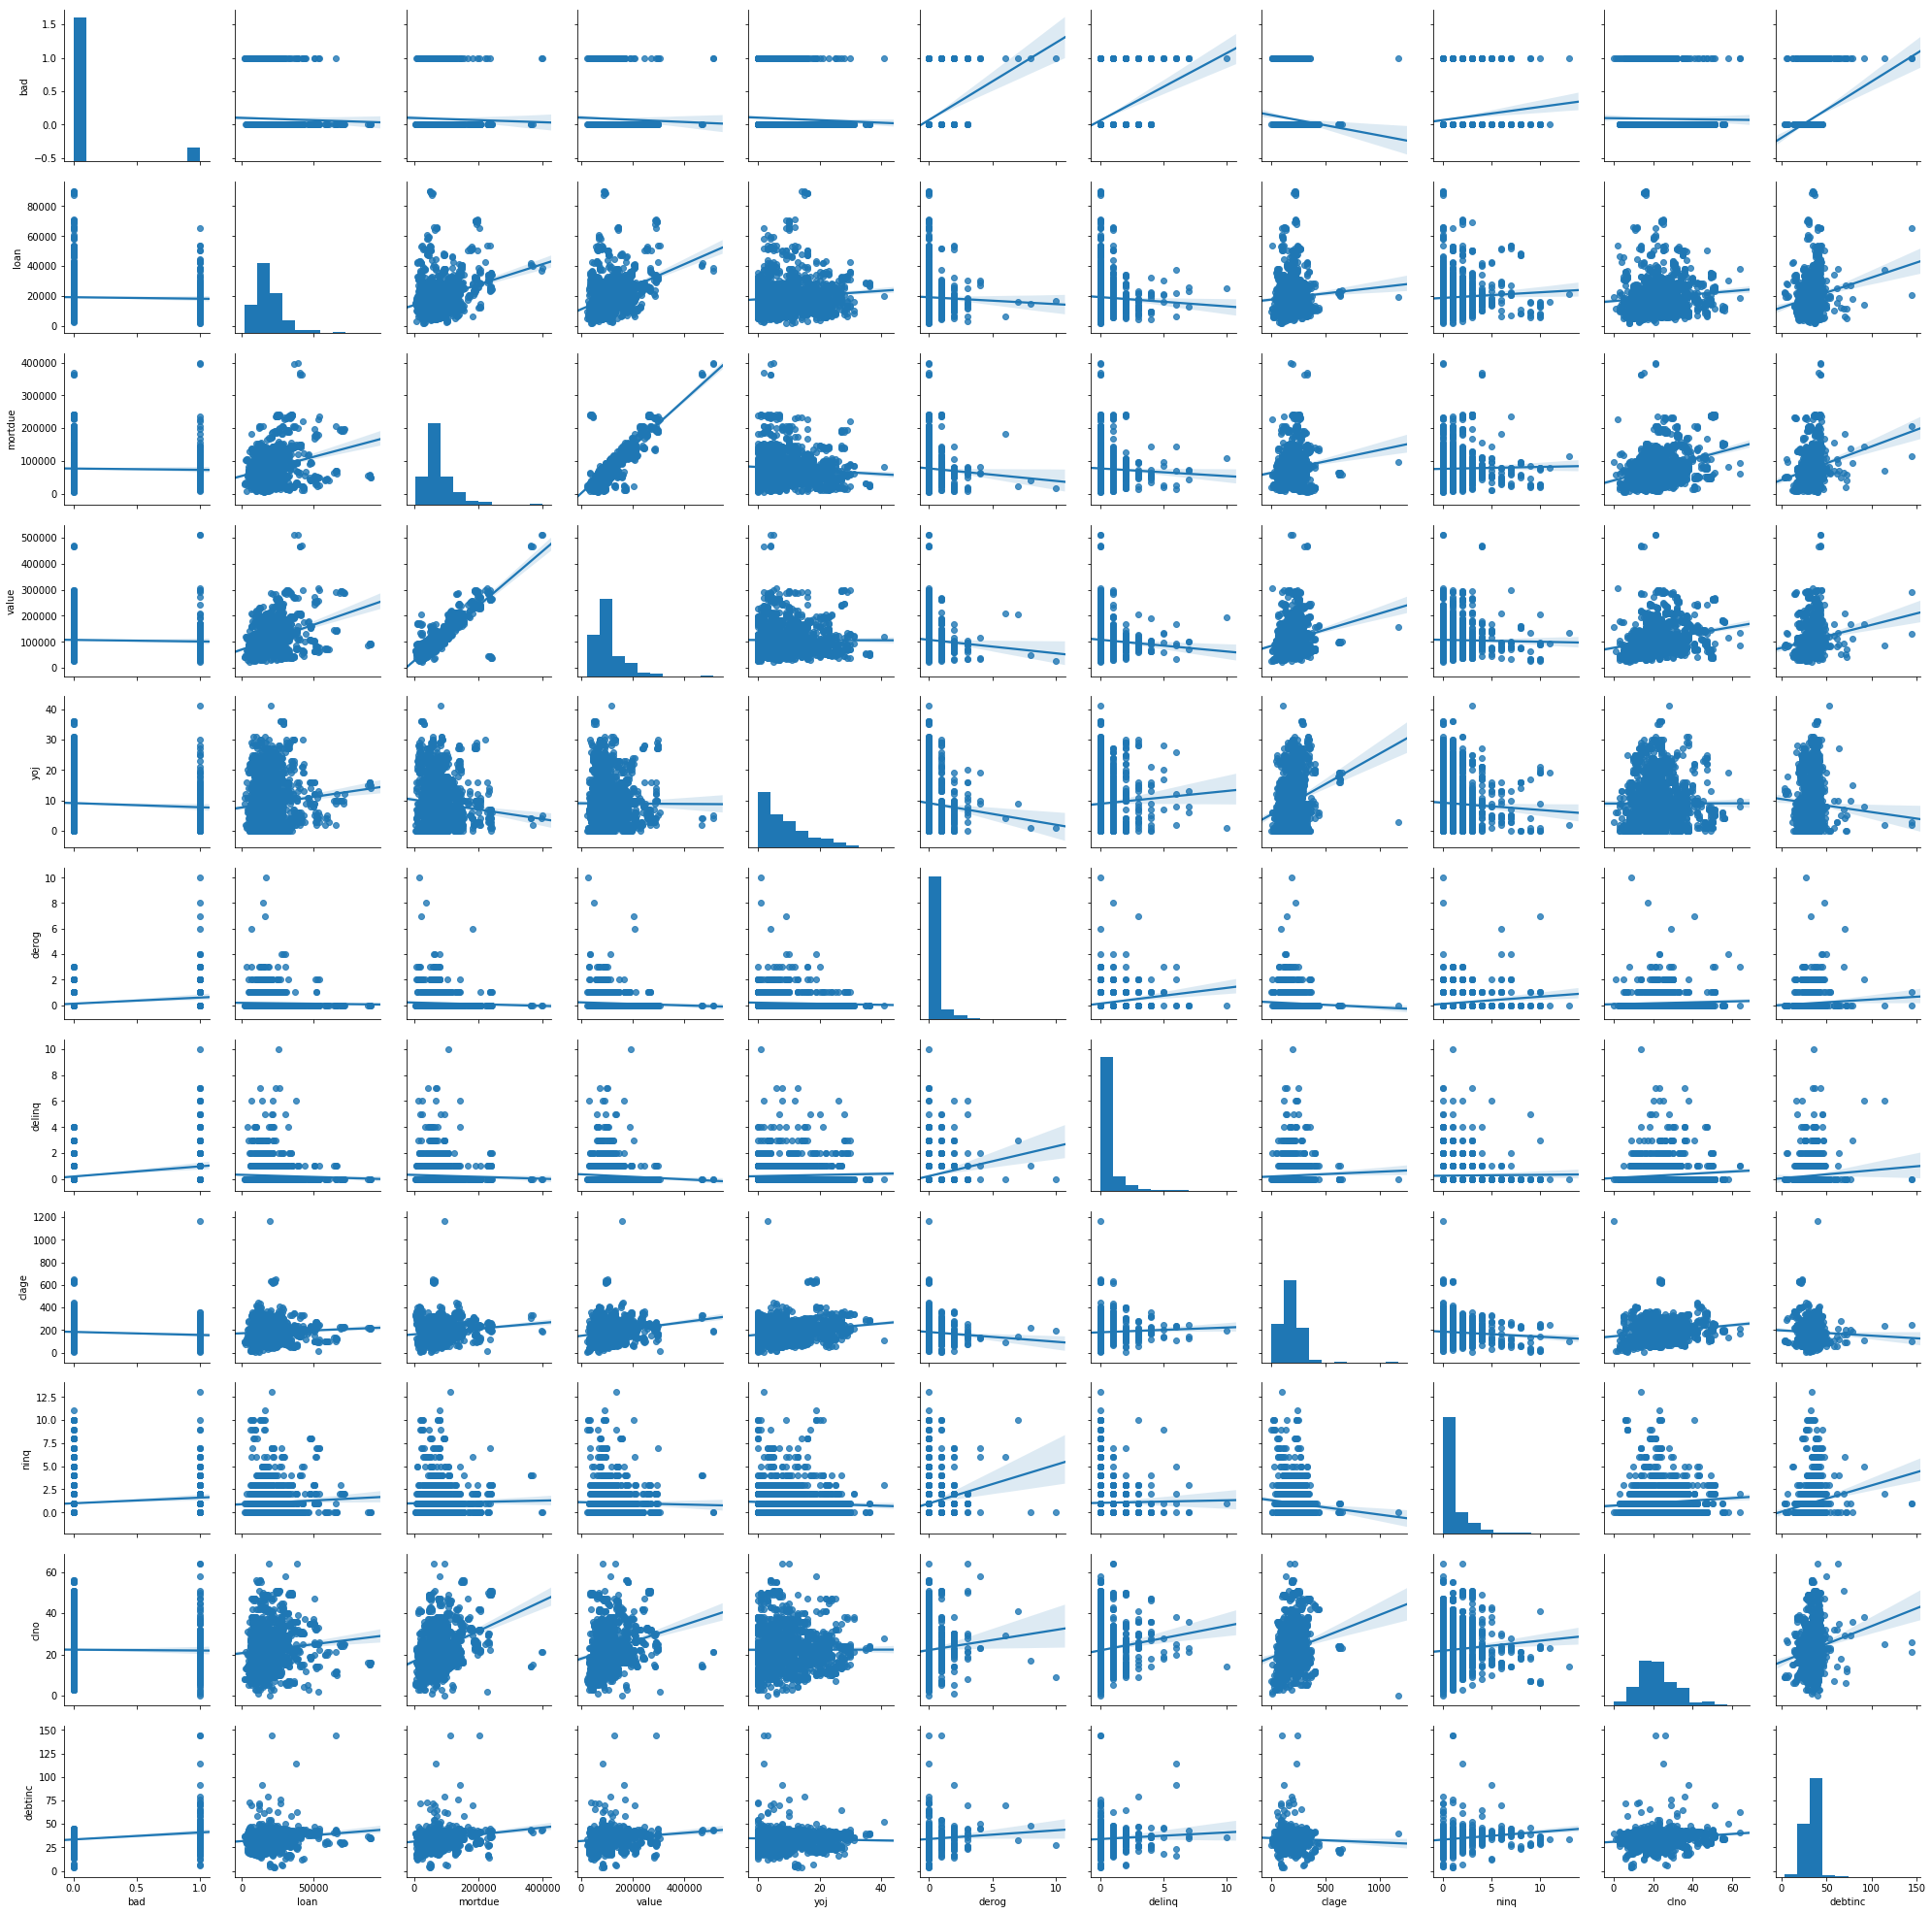

In [12]:
sns.pairplot(data_copy_won, kind="reg")#easily see relation between columns, fit to lineer regression
#easily see that there is a linear regression between value and mortdue 

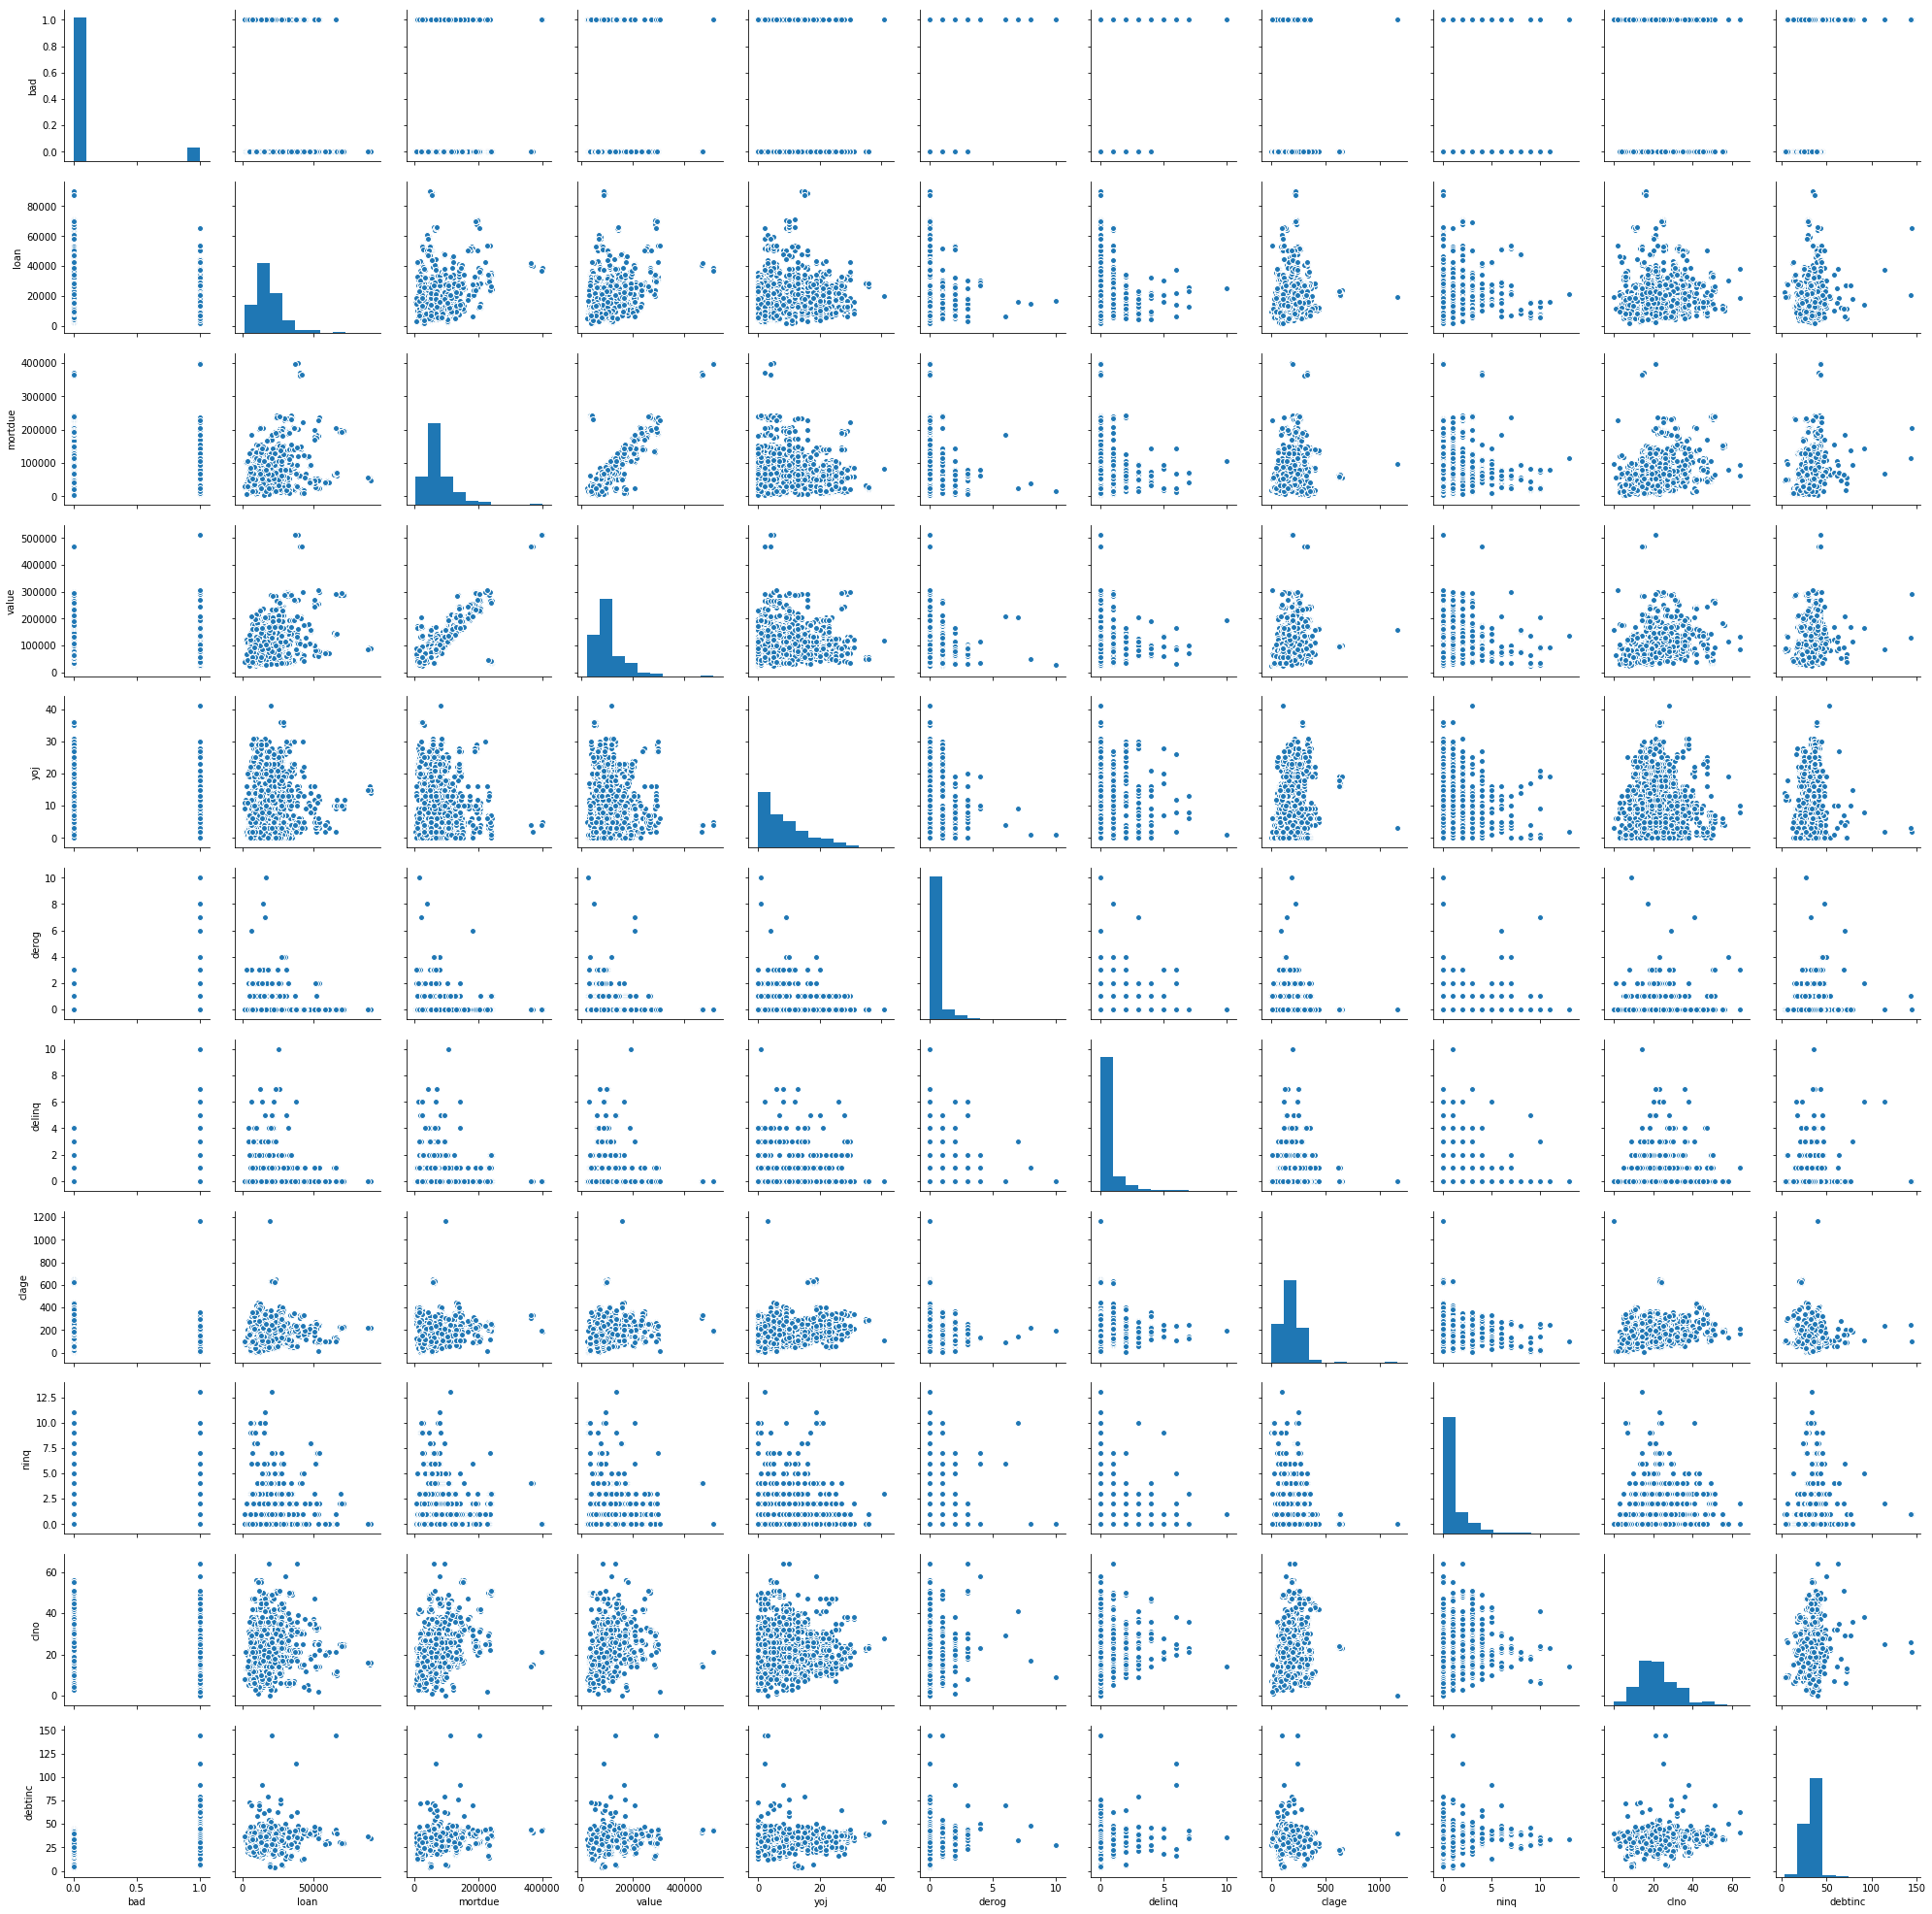

In [13]:
sns.pairplot(data_copy_won, kind="scatter")

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


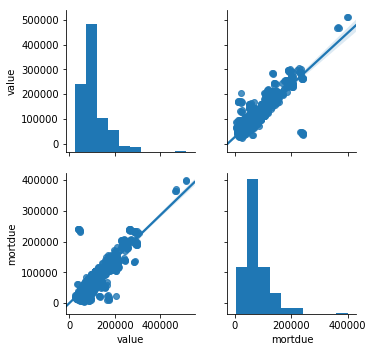

In [14]:
 sns.pairplot(data_copy_won, vars=["value","mortdue"], kind="reg") #plot value and mortdue linear regression fit for easly see

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


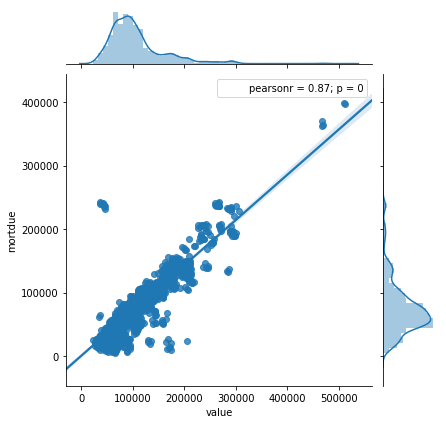

In [15]:
sns.jointplot(x="value", y="mortdue", data=data_copy_won, kind="reg")#Draw a plot of value and mortudue variables with bivariate and univariate graphs

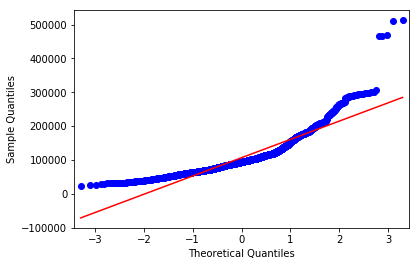

In [16]:
sm.qqplot(data_copy_won["value"], line="s") 
pylab.show()
#Generates a probability plot of value data against the quantiles of a specified normal distribution 

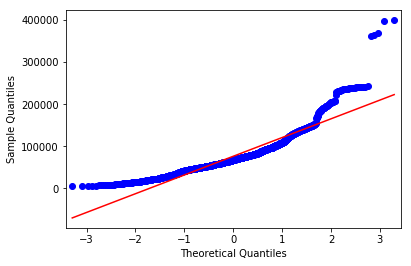

In [17]:
sm.qqplot(data_copy_won["mortdue"], line="s") 
pylab.show()
#Same to value data,  probability normal distiribution plot

In [18]:
m=data_copy_won["mortdue"]
m[0:5]

153     94727.0
154     79240.0
155    241931.0
156     62989.0
157     25859.0
Name: mortdue, dtype: float64

In [19]:
m_c=sm.add_constant(m) # add constant value to mordue datas
m_c[0:5]

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [20]:
v=data_copy_won["value"]
v[0:5]

153    136877.0
154     96784.0
155     36486.0
156     76718.0
157     43684.0
Name: value, dtype: float64

In [21]:
v_c=sm.add_constant(v) # add constant value to value datas
v_c[0:5]

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,value
153,1.0,136877.0
154,1.0,96784.0
155,1.0,36486.0
156,1.0,76718.0
157,1.0,43684.0


In [22]:
lm=sm.OLS(v_c,m_c)
model=lm.fit()

Check how close the R-squared and Adj R-squared values are to 1

In [23]:
lm= smf.ols("value~mortdue", data_copy_won)
model=lm.fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:47:03   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model.params #take beta0 and beta1

Intercept    26469.270925
mortdue          1.053617
dtype: float64

value=26469.270925+1.053617*mortdue+Error 

In [26]:
print("value= " +str("%.2f" %model.params[0]) +"+"+ "mortdue" + "*" + str("%.2f" %model.params[1]))

value= 26469.27+mortdue*1.05


In [27]:
model.conf_int()

,0,1
Intercept,24136.594103,28801.947746
mortdue,1.027212,1.080021


In [28]:
model.fittedvalues[0:5]

153    126275.218545
154    109957.856961
155    281371.808888
156     92835.532230
157     53714.744755
dtype: float64

Text(0.5,0,'amount due on existing mortgage')

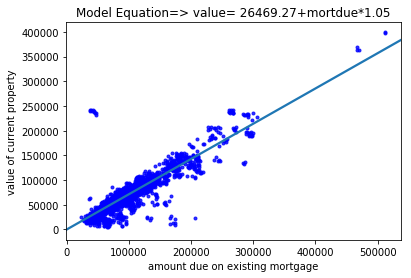

In [29]:
g= sns.regplot(data_copy_won["value"], data_copy_won["mortdue"], ci=None, scatter_kws={"color":"b", "s":9})
g.set_title("Model Equation=> value= 26469.27+mortdue*1.05")
g.set_ylabel("value of current property")
g.set_xlabel("amount due on existing mortgage")

In [30]:
X=data_copy_won[["mortdue"]]
y=data_copy_won["value"]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_

26469.270924685537

In [31]:
model.coef_


array([1.05361668])

In [32]:
model.score(X,y)#Check how close the result of function to 1

0.7523274620492051

In [33]:
model.predict(X)[0:4]#returns the first 4 predicted values

array([126275.21854483, 109957.85696056, 281371.8088884 ,  92835.53222975])

In [34]:
m= smf.ols("value~mortdue",data_copy_won)
model=lm.fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:47:03   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
mse=mean_squared_error(y, model.fittedvalues)
mse#return to mean squared error

722569435.9837799

In [37]:
rmse=np.sqrt(mse)
rmse

26880.65170310757

In [38]:
reg.predict(X)[0:4]

array([126275.21854483, 109957.85696056, 281371.8088884 ,  92835.53222975])

In [39]:
X[0:4]

,mortdue
153,94727.0
154,79240.0
155,241931.0
156,62989.0


In [40]:
compare_real_predicted=pd.DataFrame({"real_value": y[0:4], "predicted_value": reg.predict(X)[0:4]})
compare_real_predicted

,real_value,predicted_value
153,136877.0,126275.218545
154,96784.0,109957.856961
155,36486.0,281371.808888
156,76718.0,92835.532230


In [41]:
compare_real_predicted["Error"]=compare_real_predicted["real_value"]-compare_real_predicted["predicted_value"]
print(compare_real_predicted)

     real_value  predicted_value          Error
153    136877.0    126275.218545   10601.781455
154     96784.0    109957.856961  -13173.856961
155     36486.0    281371.808888 -244885.808888
156     76718.0     92835.532230  -16117.532230


In [42]:
compare_real_predicted["error_square"]=compare_real_predicted["Error"]**2
print("Error square sum is: "+ str(np.sum(compare_real_predicted["error_square"])))
print("Error square mean is: "+ str(np.mean(compare_real_predicted["error_square"])))
print("Error mean is: "+ str(np.sqrt(np.mean(compare_real_predicted["error_square"]))))

Error square sum is: 60514782517.34479
Error square mean is: 15128695629.336197
Error mean is: 122998.76271465578


In [46]:
data_copy_won.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 300.7+ KB


In [50]:
data_ = pd.get_dummies(data_copy_won[["reason","job"]])
data_.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [51]:
X_ = data_copy_won.drop(["value","reason","job"], axis=1).astype("float64")
X_.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [62]:
data_ = data_copy_won.copy()
X = pd.concat([X_, data_[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis=1)
X = pd.concat([X, df[["value"]]], axis=1)
data_copy_won = X.copy()
X= data_copy_won[["mortdue"]]
X= sm.add_constant(X)
X[0:5]

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [71]:
data_copy_won.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self,value
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,136877.0
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,96784.0
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,36486.0
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,76718.0
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,43684.0


In [63]:
y = data_copy_won['value']
lm = sm.OLS(y,X) 
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:31:30   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X_=data_copy_won.drop("value", axis=1)
y=data_copy_won["value"]
X_train, X_test, y_train, y_test=train_test_split(X_,y, test_size=0.20)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
training=data_copy_won.copy()
print(training.shape)

(1614, 17)
(1614,)
(404, 17)
(404,)
(2018, 18)


In [89]:
X_

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1.0,7200.0,15637.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,1,0,0,0,0,1
3546,1.0,53400.0,228236.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,1,0,0,0,0,1
3547,1.0,27300.0,106221.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1,0,0,0,0,0,1
3548,1.0,37300.0,68789.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,1,0,0,0,0,1


In [83]:
y

153     136877.0
154      96784.0
155      36486.0
156      76718.0
157      43684.0
          ...   
3544     39660.0
3546    305514.0
3547    137727.0
3548     86172.0
3549     58760.0
Name: value, Length: 2018, dtype: float64

In [73]:
lm=sm.OLS(y_train, X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     393.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:49:44   Log-Likelihood:                -18559.
No. Observations:                1614   AIC:                         3.715e+04
Df Residuals:                    1597   BIC:                         3.724e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bad             1864.0473   2366.251      0.788      0.431   -2777.237    6505.332
loan               0.6941      0.061     11.363      0.000       0.574       0.814
mortdue            1.0048      0.016     63.104      0.000       0.974       1.036
yoj              320.8239     83.415      3.846      0.000     157.209     484.439
derog           1412.6132   1146.807      1.232      0.218    -836.793    3662.019
delinq         -1329.9270    828.568     -1.605      0.109   -2955.123     295.269
clage             38.6793      7.446      5.194      0.000      24.074      53.285
ninq            -401.2834    390.246     -1.028      0.304   -1166.731     364.164
clno            -401.4455     69.081     -5.811      0.000    -536.944    -265.947
debtinc         -164.7721     73.469     -2.243      0.025    -308.877     -20.667
reason_DebtCon  1.844e+04   3128.665      5.894      0.000    1.23e+04    2.46e+04
reason_HomeImp  2.101e+04   3209.435      6.545      0.000    1.47e+04    2.73e+04
job_Mgr        -2825.7730   1935.111     -1.460      0.144   -6621.397     969.851
job_Office      1820.3535   1735.794      1.049      0.294   -1584.320    5225.027
job_ProfEx      1.006e+04   1615.846      6.224      0.000    6887.856    1.32e+04
job_Sales       1934.6417   5048.027      0.383      0.702   -7966.815    1.18e+04
job_Self        1.403e+04   3752.410      3.739      0.000    6669.742    2.14e+04
==============================================================================
Omnibus:                      945.315   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70651.207
Skew:                          -1.905   Prob(JB):                         0.00
Kurtosis:                      35.188   Cond. No.                     7.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
bad,1864.0473,2366.251,0.788,0.431,-2777.237,6505.332
loan,0.6941,0.061,11.363,0.000,0.574,0.814
mortdue,1.0048,0.016,63.104,0.000,0.974,1.036
yoj,320.8239,83.415,3.846,0.000,157.209,484.439
derog,1412.6132,1146.807,1.232,0.218,-836.793,3662.019
delinq,-1329.9270,828.568,-1.605,0.109,-2955.123,295.269
clage,38.6793,7.446,5.194,0.000,24.074,53.285
ninq,-401.2834,390.246,-1.028,0.304,-1166.731,364.164
clno,-401.4455,69.081,-5.811,0.000,-536.944,-265.947
debtinc,-164.7721,73.469,-2.243,0.025,-308.877,-20.667


In [75]:
influence=model.get_influence()
influence

Leverange v.s studentized Residuals


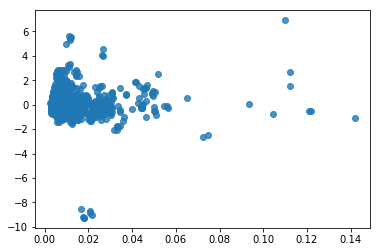

In [76]:
resid_student=influence.resid_studentized_external 
(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage=influence.hat_matrix_diag
print("Leverange v.s studentized Residuals")
sns.regplot(leverage, model.resid_pearson,fit_reg=False)
#detect to outliers
#check whether the eror is coming from normal

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


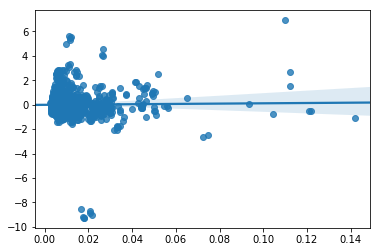

In [77]:
sns.regplot(leverage, model.resid_pearson,fit_reg=True)

In [90]:
data_copy_won.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self,value
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,136877.0
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,96784.0
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,36486.0
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,76718.0
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,43684.0


In [78]:
bankres=pd.concat([data_copy_won, pd.Series(model.resid, name="resid"),pd.Series(model.predict(), name="predict")], axis=1)
model.predict()

array([ 82502.32850874,  49764.50008611,  54484.21218324, ...,
       103548.1510518 , 174366.40526554, 116527.30181871])

In [79]:
model.resid

678    -17448.328509
2337     2692.499914
348    -12164.212183
1585    48847.071070
1698     1289.257639
            ...     
3394    56560.785796
3097   -12039.200990
1606    -2942.151052
2226    -4485.405266
2220   -28185.301819
Length: 1614, dtype: float64

In [99]:
bankres.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self,value,resid,predict
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82502.328509
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49764.500086
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54484.212183
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39801.928930
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62547.742361


In [92]:
bankres.tail()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self,value,resid,predict
3544,1.0,7200.0,15637.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0.0,1.0,0.0,0.0,0.0,0.0,1.0,39660.0,-8641.184321,NaN
3546,1.0,53400.0,228236.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0.0,1.0,0.0,0.0,0.0,0.0,1.0,305514.0,6358.026601,NaN
3547,1.0,27300.0,106221.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1.0,0.0,0.0,0.0,0.0,0.0,1.0,137727.0,-10242.950022,NaN
3548,1.0,37300.0,68789.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0.0,1.0,0.0,0.0,0.0,0.0,1.0,86172.0,-17882.578009,NaN
3549,1.0,13300.0,25698.0,15.0,0.0,0.0,147.91,1.0,10.0,30.962,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58760.0,-14208.650134,NaN


C:\Users\Ayse Akca\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


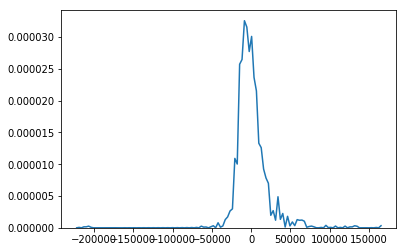

In [84]:
sns.kdeplot(np.array(bankres.resid), bw=10)

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


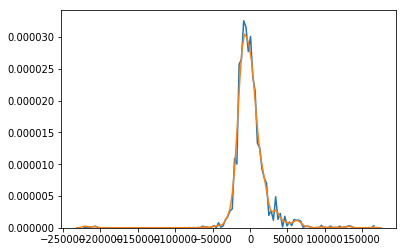

In [94]:
sns.kdeplot(np.array(bankres.resid), bw=10)
sns.distplot(np.array(bankres.resid), hist=False)

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


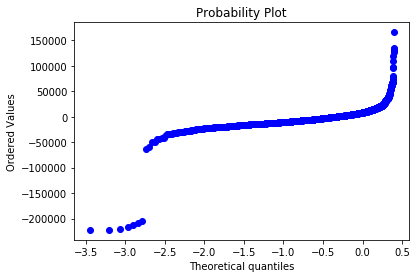

In [96]:
stats.probplot(bankres.resid, dist="norm",plot=pylab)
pylab.show()

In [100]:
bankres=bankres.dropna()
bankres

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self,value,resid,predict
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1.0,0.0,1.0,0.0,0.0,0.0,0.0,136877.0,19280.385075,93038.152660
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1.0,0.0,1.0,0.0,0.0,0.0,0.0,96784.0,703.203818,106981.244503
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,76718.0,-328.410568,85080.086843
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1.0,0.0,1.0,0.0,0.0,0.0,0.0,43684.0,-8534.045242,65540.641987
158,0.0,23900.0,140328.0,8.0,0.0,0.0,322.79,0.0,17.0,45.413,0.0,1.0,1.0,0.0,0.0,0.0,0.0,183533.0,7017.694047,164604.241634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.0,18700.0,37883.0,25.0,0.0,0.0,237.00,0.0,13.0,23.621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64763.0,-15364.118786,201195.331523
1606,0.0,21000.0,67657.0,5.0,0.0,0.0,225.29,1.0,12.0,31.044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,100606.0,-2942.151052,87445.150435
1608,0.0,17500.0,46636.0,7.0,0.0,0.0,110.23,3.0,15.0,41.512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72908.0,3015.952795,84162.365242
1610,0.0,15900.0,69548.0,1.0,0.0,0.0,230.67,2.0,25.0,30.108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,89775.0,-3027.937519,49572.200990


In [102]:
stat, p = shapiro (bankres.resid.dropna())
bankres = bankres.dropna()
bankres

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self,value,resid,predict
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1.0,0.0,1.0,0.0,0.0,0.0,0.0,136877.0,12608.641917,145211.575655
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1.0,0.0,1.0,0.0,0.0,0.0,0.0,96784.0,246.050514,118350.408330
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1.0,0.0,1.0,0.0,0.0,0.0,0.0,36486.0,-238505.894947,93602.283903
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,76718.0,564.905536,73453.983012
159,0.0,19700.0,70709.0,0.0,0.0,0.0,94.86,0.0,17.0,25.557,1.0,0.0,1.0,0.0,0.0,0.0,0.0,97394.0,4311.915190,114049.591187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,0.0,7100.0,53273.0,5.0,0.0,0.0,84.84,0.0,17.0,22.861,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54378.0,-12109.376043,109169.361524
1610,0.0,15900.0,69548.0,1.0,0.0,0.0,230.67,2.0,25.0,30.108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,89775.0,-4637.174897,179476.684139
1611,0.0,27100.0,20479.0,24.0,0.0,0.0,103.82,0.0,10.0,24.259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,46735.0,-10999.617538,65753.485512
1612,0.0,12600.0,83552.0,21.0,0.0,0.0,128.66,4.0,24.0,28.723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,107186.0,1798.528969,117867.611017


In [105]:
stat,p=shapiro(bankres.resid)

print('Statictics=%.3f, p=%.3f' %(stat,p))

alpha=0.5
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)')

Statictics=0.572, p=0.000
Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)


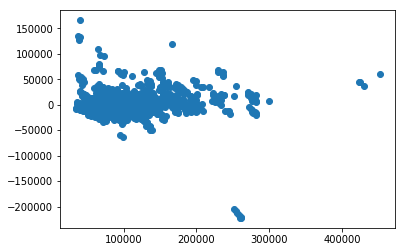

In [108]:
resid=model.resid
plt.scatter(model.predict(),resid)

In [111]:
lm=smf.ols("value~bad+loan+mortdue", data_copy_won).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     2271.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:05:51   Log-Likelihood:                -23362.
No. Observations:                2018   AIC:                         4.673e+04
Df Residuals:                    2014   BIC:                         4.676e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.655e+04   1393.377     11.875      0.000    1.38e+04    1.93e+04
bad        -1290.2598   2028.185     -0.636      0.525   -5267.819    2687.299
loan           0.7292      0.056     13.097      0.000       0.620       0.838
mortdue        1.0035      0.013     74.440      0.000       0.977       1.030
==============================================================================
Omnibus:                     1494.695   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124883.448
Skew:                          -2.783   Prob(JB):                         0.00
Kurtosis:                      41.135   Cond. No.                     3.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
y,X=dmatrices("value~bad+loan+mortdue", data= data_copy_won, return_type="dataframe")
vlf=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vlf

[5.87452658671339, 1.0010272152160995, 1.0872594009184988, 1.0871990856476603]

In [113]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)
print(model.intercept_)
model.coef_

19723.484510160764


array([ 1.86404727e+03,  6.94113451e-01,  1.00480033e+00,  3.20823879e+02,
        1.41261316e+03, -1.32992704e+03,  3.86793478e+01, -4.01283372e+02,
       -4.01445484e+02, -1.64772075e+02, -1.28213186e+03,  1.28213186e+03,
       -2.82577304e+03,  1.82035355e+03,  1.00572583e+04,  1.93464173e+03,
        1.40299094e+04])

In [114]:
lm=smf.ols("value~bad+loan+mortdue+yoj+derog+delinq+clage+ninq+clno+debtinc", data_copy_won).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     747.9
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:15:48   Log-Likelihood:                -23286.
No. Observations:                2018   AIC:                         4.659e+04
Df Residuals:                    2007   BIC:                         4.666e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.044e+04   2844.532      7.184      0.000    1.49e+04     2.6e+04
bad         3535.3740   2160.238      1.637      0.102    -701.170    7771.918
loan           0.7126      0.055     13.031      0.000       0.605       0.820
mortdue        1.0381      0.014     73.396      0.000       1.010       1.066
yoj          314.9215     76.614      4.110      0.000     164.669     465.174
derog        804.8722   1003.229      0.802      0.422   -1162.607    2772.352
delinq     -1746.7699    744.966     -2.345      0.019   -3207.758    -285.782
clage         48.7534      6.966      6.999      0.000      35.093      62.414
ninq       -1033.7185    362.168     -2.854      0.004   -1743.983    -323.454
clno        -442.9427     64.386     -6.880      0.000    -569.212    -316.673
debtinc     -205.5180     70.911     -2.898      0.004    -344.585     -66.451
==============================================================================
Omnibus:                     1412.259   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109554.846
Skew:                          -2.559   Prob(JB):                         0.00
Kurtosis:                      38.732   Cond. No.                     4.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
y,X=dmatrices("value~bad+loan+mortdue+yoj+derog+delinq+clage+ninq+clno+debtinc", data= data_copy_won, return_type="dataframe")
vlf=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vlf

[26.30879522279302,
 1.2203325114247947,
 1.126903369159637,
 1.286095570410837,
 1.0940111842984903,
 1.1019224841312072,
 1.1250940525682491,
 1.1237460186160104,
 1.062004994145996,
 1.2049556559316381,
 1.1636302879926317]